  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0  25-Sep-21          2020  PG-13     90 min   
1  24-Sep-21          2021  TV-MA  2 Seasons   
2  24-Sep-21          2021  TV-MA   1 Season   
3  24-Se

C:\Users\josep\AppData\Local\Temp\ipykernel_23144\1271745242.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


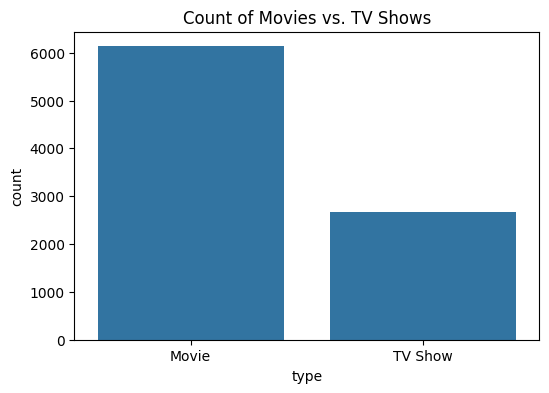

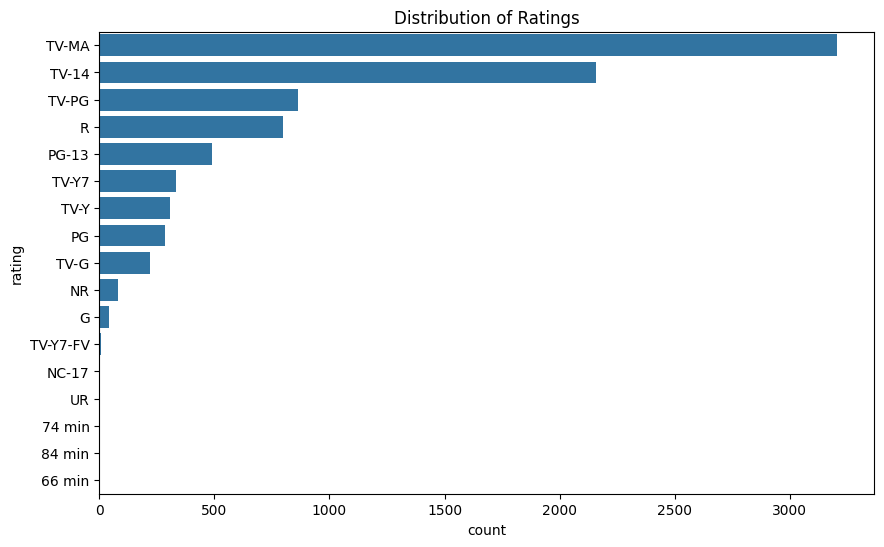

In [1]:
# netflix_analysis.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('netflix_titles.csv')

# 2. Quick overview
print(df.head())
print(df.info())

# 3. Handling duplicates
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# 4. Missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# You may choose to fill or drop NA for certain columns:
# Example: df['country'].fillna('Unknown', inplace=True)

# 5. Convert date_added to a datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# 6. Exploratory analysis
# Number of movies vs TV shows
type_counts = df['type'].value_counts()
print("Count of Movies vs. TV Shows:")
print(type_counts)

# Distribution of ratings
rating_counts = df['rating'].value_counts()
print("Ratings distribution:")
print(rating_counts)

# Release year analysis
release_year_counts = df['release_year'].value_counts().head(10)
print("Top 10 release years:")
print(release_year_counts)

# 7. Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Count of Movies vs. TV Shows')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

# 8. Export cleaned data
df.to_csv('cleaned_netflix.csv', index=False)
